# Emission Measure Analysis
Compute emission measure distributions from the time-averaged intensity in each AIA channel using the method of Hannah and Kontar (2012)

In [1]:
import sys
import numpy as np
from sunpy.map import Map
import matplotlib.pyplot as plt
import dask
import distributed

sys.path.append('../scripts/')
from aiacube import DistributedAIACollection,DistributedAIACube
from timelags import AIATimeLags

%matplotlib inline

Spin up a Dask cluster

In [2]:
cluster = distributed.LocalCluster(n_workers=64,threads_per_worker=1,)
client = distributed.Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:33816 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 64 Cores: 64 Memory: 270.38 GB


## DEM Setup
Configure IDL code for running DEM model

## Heating Cases

In [3]:
channels = [94,131,171,193,211,335]

In [4]:
read_template = '/storage-home/w/wtb2/data/timelag_synthesis_v2/{}/SDO_AIA/{}/map_t{:06d}.fits'

### Cooling

In [5]:
cooling = DistributedAIACollection(*[DistributedAIACube.from_files([read_template.format('cooling/nei',c,i) for i in range(0,1000)]) for c in channels])

In [6]:
time_average_maps = {c:cooling[c].average() for c in cooling.channels}
time_average_maps = {c:Map(time_average_maps[c].data.compute(),time_average_maps[c].meta) for c in time_average_maps}

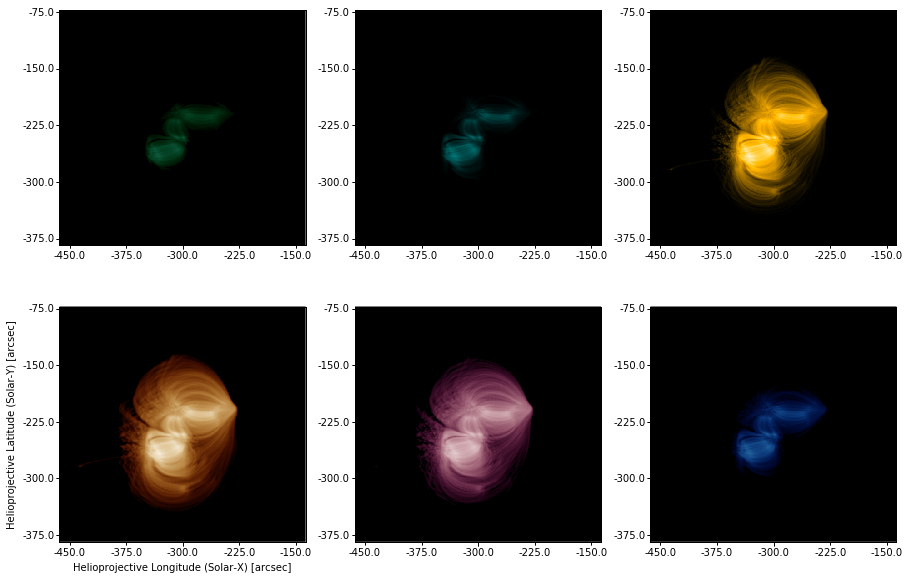

In [7]:
fig = plt.figure(figsize=(15,10))
for i,c in enumerate(cooling.channels):
    ax = fig.add_subplot(2,3,i+1,projection=time_average_maps[c])
    time_average_maps[c].plot(axes=ax,vmin=1,vmax=1e3,title=False,annotate=True if i==3 else False)
    ax.grid(alpha=0)

### High Frequency

In [8]:
high_freq = DistributedAIACollection(*[DistributedAIACube.from_files([read_template.format('high_frequency/nei',c,i) for i in range(500,2500)]) for c in channels])

In [9]:
time_average_maps = {c:high_freq[c].average() for c in high_freq.channels}
time_average_maps = {c:Map(time_average_maps[c].data.compute(),time_average_maps[c].meta) for c in time_average_maps}

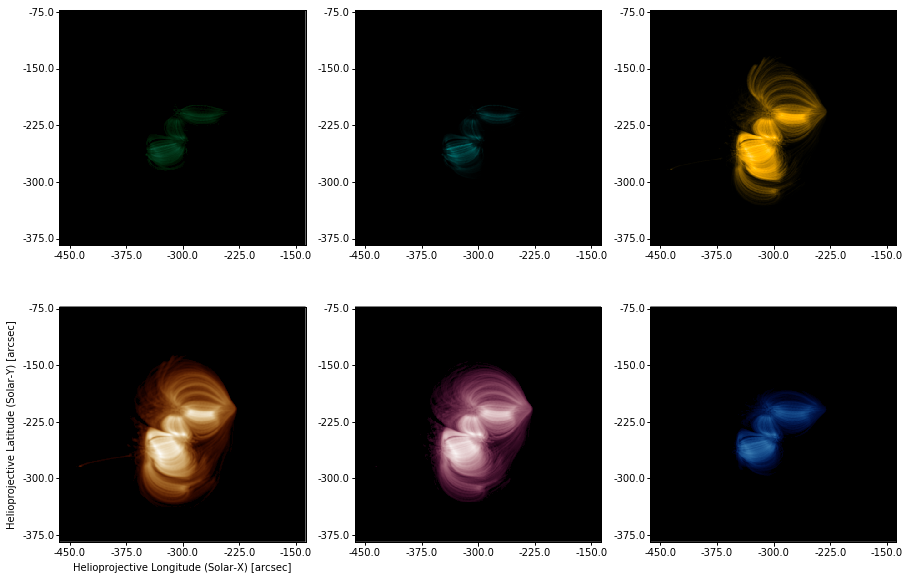

In [10]:
fig = plt.figure(figsize=(15,10))
for i,c in enumerate(high_freq.channels):
    ax = fig.add_subplot(2,3,i+1,projection=time_average_maps[c])
    time_average_maps[c].plot(axes=ax,vmin=1,vmax=1e3,title=False,annotate=True if i==3 else False)
    ax.grid(alpha=0)